<a href="https://colab.research.google.com/github/Bone-Age-Maisha/Bone_imp_1/blob/main/segmented_atlas011.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!sudo add-apt-repository -y ppa:alessandro-strada/ppa 2>&1 > /dev/null
!sudo apt-get update -qq 2>&1 > /dev/null
!sudo apt -y install -qq google-drive-ocamlfuse 2>&1 > /dev/null
!google-drive-ocamlfuse 




debconf: unable to initialize frontend: Dialog
debconf: (No usable dialog-like program is installed, so the dialog based frontend cannot be used. at /usr/share/perl5/Debconf/FrontEnd/Dialog.pm line 76, <> line 1.)
debconf: falling back to frontend: Readline
debconf: unable to initialize frontend: Readline
debconf: (This frontend requires a controlling tty.)
debconf: falling back to frontend: Teletype
dpkg-preconfigure: unable to re-open stdin: 
/usr/bin/xdg-open: 851: /usr/bin/xdg-open: www-browser: not found
/usr/bin/xdg-open: 851: /usr/bin/xdg-open: links2: not found
/usr/bin/xdg-open: 851: /usr/bin/xdg-open: elinks: not found
/usr/bin/xdg-open: 851: /usr/bin/xdg-open: links: not found
/usr/bin/xdg-open: 851: /usr/bin/xdg-open: lynx: not found
/usr/bin/xdg-open: 851: /usr/bin/xdg-open: w3m: not found
xdg-open: no method available for opening 'https://accounts.google.com/o/oauth2/auth?client_id=564921029129.apps.googleusercontent.com&redirect_uri=https%3A%2F%2Fgd-ocaml-auth.appspot.

In [ ]:
!sudo apt-get install -qq w3m # to act as web browser 
!xdg-settings set default-web-browser w3m.desktop # to set default browser
%cd /content
!mkdir drive
%cd drive
!mkdir MyDrive
%cd ..
%cd ..
!google-drive-ocamlfuse /content/drive/MyDrive

debconf: unable to initialize frontend: Dialog
debconf: (No usable dialog-like program is installed, so the dialog based frontend cannot be used. at /usr/share/perl5/Debconf/FrontEnd/Dialog.pm line 76, <> line 1.)
debconf: falling back to frontend: Readline
debconf: unable to initialize frontend: Readline
debconf: (This frontend requires a controlling tty.)
debconf: falling back to frontend: Teletype
dpkg-preconfigure: unable to re-open stdin: 
Selecting previously unselected package w3m.
(Reading database ... 124021 files and directories currently installed.)
Preparing to unpack .../w3m_0.5.3-36build1_amd64.deb ...
Unpacking w3m (0.5.3-36build1) ...
Setting up w3m (0.5.3-36build1) ...
Processing triggers for mime-support (3.60ubuntu1) ...
Processing triggers for man-db (2.8.3-2ubuntu0.1) ...
/content
/content/drive
/content
/
Access token retrieved correctly.


In [ ]:
import numpy as np
import cv2
import os
import pandas as pd


In [ ]:
import pandas as pd
train_dir = '/content/drive/MyDrive/HAND_SEG_ATLAS'
df = pd.read_csv('/content/drive/MyDrive/hand_atlas/data.csv')

In [ ]:
df.drop(df[(df['id'] == 7144)].index, inplace=True)

In [ ]:
import os
age_df = df 
age_df['path'] = age_df['id'].map(lambda x: os.path.join(train_dir, 
                                                         '{}.jpg'.format(x)))
#age_df['exists'] = age_df['path'].map(os.path.exists)

In [ ]:
age1=age_df

In [ ]:
ag=age1.boneage.unique()
ag.shape

(1048,)

In [ ]:
age1.drop(df[(age1['gender'] == 0)].index, inplace=True)

In [ ]:
age1

,Unnamed: 0,id,boneage,gender,path
0,0,5014,216.30,1,/content/drive/MyDrive/HAND_SEG_ATLAS/5014.jpg
1,1,5059,221.10,1,/content/drive/MyDrive/HAND_SEG_ATLAS/5059.jpg
2,2,5300,226.40,1,/content/drive/MyDrive/HAND_SEG_ATLAS/5300.jpg
3,3,5084,227.70,1,/content/drive/MyDrive/HAND_SEG_ATLAS/5084.jpg
4,4,5342,224.40,1,/content/drive/MyDrive/HAND_SEG_ATLAS/5342.jpg
...,...,...,...,...,...
859,859,3134,55.27,1,/content/drive/MyDrive/HAND_SEG_ATLAS/3134.jpg
860,860,4486,48.85,1,/content/drive/MyDrive/HAND_SEG_ATLAS/4486.jpg
861,861,3736,47.90,1,/content/drive/MyDrive/HAND_SEG_ATLAS/3736.jpg
862,862,3734,59.18,1,/content/drive/MyDrive/HAND_SEG_ATLAS/3734.jpg


In [ ]:
ag=age1.boneage.unique()
ag.shape

(600,)

In [ ]:
train1_df = age1.groupby(['boneage']).apply(lambda x: x.sample(5, replace = True)
                                                      ).reset_index(drop = True)

In [ ]:
train1_df

,Unnamed: 0,id,boneage,gender,path
0,504,5574,0.3616,1,/content/drive/MyDrive/HAND_SEG_ATLAS/5574.jpg
1,504,5574,0.3616,1,/content/drive/MyDrive/HAND_SEG_ATLAS/5574.jpg
2,504,5574,0.3616,1,/content/drive/MyDrive/HAND_SEG_ATLAS/5574.jpg
3,504,5574,0.3616,1,/content/drive/MyDrive/HAND_SEG_ATLAS/5574.jpg
4,504,5574,0.3616,1,/content/drive/MyDrive/HAND_SEG_ATLAS/5574.jpg
...,...,...,...,...,...
2995,3,5084,227.7000,1,/content/drive/MyDrive/HAND_SEG_ATLAS/5084.jpg
2996,3,5084,227.7000,1,/content/drive/MyDrive/HAND_SEG_ATLAS/5084.jpg
2997,3,5084,227.7000,1,/content/drive/MyDrive/HAND_SEG_ATLAS/5084.jpg
2998,3,5084,227.7000,1,/content/drive/MyDrive/HAND_SEG_ATLAS/5084.jpg


In [ ]:
from sklearn.model_selection import train_test_split
train_test1, valid1 = train_test_split(train1_df, 
                                   test_size = 0.2, 
                                   random_state = 2018,
                                   stratify = train1_df['boneage'])
#print('train', raw_train_df.shape[0], 'validation', valid_df.shape[0])
train1, test1 = train_test_split(train_test1, 
                                   test_size = 0.3, 
                                   random_state = 2018,
                                   stratify = train_test1['boneage'])
print('train', train1.shape[0], 'validation', valid1.shape[0],test1.shape[0])

train 1680 validation 600 720


In [ ]:
from keras.preprocessing.image import ImageDataGenerator
IMG_SIZE = (300,300)
core_idg = ImageDataGenerator(rotation_range=20,width_shift_range=0.15,height_shift_range=0.15,zoom_range=0.2,horizontal_flip=True)

In [ ]:
def flow_from_dataframe(img_data_gen, in_df, path_col, y_col, **dflow_args):
    base_dir = os.path.dirname(in_df[path_col].values[0])
    print('## Ignore next message from keras, values are replaced anyways')
    df_gen = img_data_gen.flow_from_directory(base_dir, 
                                     class_mode = 'sparse',
                                    **dflow_args)
    df_gen.filenames = in_df[path_col].values
    df_gen.filepaths.extend(df_gen.filenames)
    df_gen.classes = np.stack(in_df[y_col].values)
    df_gen.samples = in_df.shape[0]
    df_gen.n = in_df.shape[0]
    df_gen._set_index_array()
    df_gen.directory = '' 
    gen=np.ones(df_gen.samples)
    print('Reinserting dataframe: {} images'.format(in_df.shape[0]))
    #print(df_gen.samples)
    #yield (df_gen,gen)
    return df_gen

In [ ]:
train1_gen = flow_from_dataframe( core_idg, train1, 
                             path_col = 'path',
                            y_col = 'boneage', 
                            target_size = IMG_SIZE,
                             color_mode = 'rgb',
                            batch_size = 1680)

## Ignore next message from keras, values are replaced anyways
Found 0 images belonging to 0 classes.
Reinserting dataframe: 1680 images


In [ ]:
valid1_gen = flow_from_dataframe(core_idg, valid1, 
                             path_col = 'path',
                            y_col = 'boneage', 
                            target_size = IMG_SIZE,
                             color_mode = 'rgb',
                            batch_size = 600) 

## Ignore next message from keras, values are replaced anyways
Found 0 images belonging to 0 classes.
Reinserting dataframe: 600 images


In [ ]:

testcore_idg = ImageDataGenerator()

In [ ]:
test1_gen = flow_from_dataframe(testcore_idg, 
                              test1, 
                             path_col = 'path',
                            y_col = 'boneage', 
                            target_size = IMG_SIZE,
                             color_mode = 'rgb',
                            batch_size = 720)

## Ignore next message from keras, values are replaced anyways
Found 0 images belonging to 0 classes.
Reinserting dataframe: 720 images


In [ ]:
train1_X, train1_Y = next(train1_gen)

In [ ]:
train1_X.shape

(1680, 300, 300, 3)

In [ ]:
valid1_X, valid1_Y = next(valid1_gen)

In [ ]:
valid1_X.shape

(600, 300, 300, 3)

In [ ]:
test1_X, test1_Y = next(test1_gen)

In [ ]:
test1_X.shape

(720, 300, 300, 3)

In [ ]:
import pandas as pd
train_dir = '/content/drive/MyDrive/HAND_SEG_ATLAS'
df = pd.read_csv('/content/drive/MyDrive/hand_atlas/data.csv')

In [ ]:
df.drop(df[(df['id'] == 7144)].index, inplace=True)

In [ ]:
import os
age_df = df 
age_df['path'] = age_df['id'].map(lambda x: os.path.join(train_dir,
                                                         '{}.jpg'.format(x)))
#age_df['exists'] = age_df['path'].map(os.path.exists)

In [ ]:
age0=age_df

In [ ]:
age0.drop(df[(age0['gender'] == 1)].index, inplace=True)

In [ ]:
age0

,Unnamed: 0,id,boneage,gender,path
515,515,4117,186.20,0,/content/drive/MyDrive/HAND_SEG_ATLAS/4117.jpg
516,516,4389,186.40,0,/content/drive/MyDrive/HAND_SEG_ATLAS/4389.jpg
517,517,4113,182.50,0,/content/drive/MyDrive/HAND_SEG_ATLAS/4113.jpg
518,518,4503,188.10,0,/content/drive/MyDrive/HAND_SEG_ATLAS/4503.jpg
519,519,4114,180.50,0,/content/drive/MyDrive/HAND_SEG_ATLAS/4114.jpg
...,...,...,...,...,...
1382,1382,6106,32.52,0,/content/drive/MyDrive/HAND_SEG_ATLAS/6106.jpg
1383,1383,5234,30.02,0,/content/drive/MyDrive/HAND_SEG_ATLAS/5234.jpg
1384,1384,5334,33.70,0,/content/drive/MyDrive/HAND_SEG_ATLAS/5334.jpg
1385,1385,6131,24.13,0,/content/drive/MyDrive/HAND_SEG_ATLAS/6131.jpg


In [ ]:
ag=age0.boneage.unique()
ag.shape

(599,)

In [ ]:
train0_df = age0.groupby(['boneage']).apply(lambda x: x.sample(5, replace = True)
                                                      ).reset_index(drop = True)

In [ ]:
train0_df

,Unnamed: 0,id,boneage,gender,path
0,1036,4706,2.038,0,/content/drive/MyDrive/HAND_SEG_ATLAS/4706.jpg
1,1036,4706,2.038,0,/content/drive/MyDrive/HAND_SEG_ATLAS/4706.jpg
2,1036,4706,2.038,0,/content/drive/MyDrive/HAND_SEG_ATLAS/4706.jpg
3,1036,4706,2.038,0,/content/drive/MyDrive/HAND_SEG_ATLAS/4706.jpg
4,1036,4706,2.038,0,/content/drive/MyDrive/HAND_SEG_ATLAS/4706.jpg
...,...,...,...,...,...
2990,1225,5198,228.100,0,/content/drive/MyDrive/HAND_SEG_ATLAS/5198.jpg
2991,1225,5198,228.100,0,/content/drive/MyDrive/HAND_SEG_ATLAS/5198.jpg
2992,1225,5198,228.100,0,/content/drive/MyDrive/HAND_SEG_ATLAS/5198.jpg
2993,1225,5198,228.100,0,/content/drive/MyDrive/HAND_SEG_ATLAS/5198.jpg


In [ ]:
from sklearn.model_selection import train_test_split
train_test0, valid0 = train_test_split(train0_df, 
                                   test_size = 0.2, 
                                   random_state = 2018,
                                   stratify = train0_df['boneage'])
#print('train', raw_train_df.shape[0], 'validation', valid_df.shape[0])
train0, test0 = train_test_split(train_test0, 
                                   test_size = 0.3, 
                                   random_state = 2018,
                                   stratify = train_test0['boneage'])
print('train', train0.shape[0], 'validation', valid0.shape[0],test0.shape[0])

train 1677 validation 599 719


In [ ]:
from keras.preprocessing.image import ImageDataGenerator
IMG_SIZE = (300,300)
core_idg = ImageDataGenerator(rotation_range=20,width_shift_range=0.15,height_shift_range=0.15,zoom_range=0.2,horizontal_flip=True)

In [ ]:
def flow_from_dataframe(img_data_gen, in_df, path_col, y_col, **dflow_args):
    base_dir = os.path.dirname(in_df[path_col].values[0])
    print('## Ignore next message from keras, values are replaced anyways')
    df_gen = img_data_gen.flow_from_directory(base_dir, 
                                     class_mode = 'sparse',
                                    **dflow_args)
    df_gen.filenames = in_df[path_col].values
    df_gen.filepaths.extend(df_gen.filenames)
    df_gen.classes = np.stack(in_df[y_col].values)
    df_gen.samples = in_df.shape[0]
    df_gen.n = in_df.shape[0]
    df_gen._set_index_array()
    df_gen.directory = '' 
    gen=np.ones(df_gen.samples)
    print('Reinserting dataframe: {} images'.format(in_df.shape[0]))
    #print(df_gen.samples)
    #yield (df_gen,gen)
    return df_gen

In [ ]:
train0_gen = flow_from_dataframe( core_idg, train0, 
                             path_col = 'path',
                            y_col = 'boneage', 
                            target_size = IMG_SIZE,
                             color_mode = 'rgb',
                            batch_size = 1677)

## Ignore next message from keras, values are replaced anyways
Found 0 images belonging to 0 classes.
Reinserting dataframe: 1677 images


In [ ]:
valid0_gen = flow_from_dataframe(core_idg, valid0, 
                             path_col = 'path',
                            y_col = 'boneage', 
                            target_size = IMG_SIZE,
                             color_mode = 'rgb',
                            batch_size = 599) 

## Ignore next message from keras, values are replaced anyways
Found 0 images belonging to 0 classes.
Reinserting dataframe: 599 images


In [ ]:

testcore_idg = ImageDataGenerator()

In [ ]:
test0_gen = flow_from_dataframe(testcore_idg, 
                              test0, 
                             path_col = 'path',
                            y_col = 'boneage', 
                            target_size = IMG_SIZE,
                             color_mode = 'rgb',
                            batch_size = 719)

## Ignore next message from keras, values are replaced anyways
Found 0 images belonging to 0 classes.
Reinserting dataframe: 719 images


In [ ]:
train0_X, train0_Y = next(train0_gen)

In [ ]:
train0_X.shape

(1677, 300, 300, 3)

In [ ]:
valid0_X, valid0_Y = next(valid0_gen)

In [ ]:
valid0_X.shape

(599, 300, 300, 3)

In [ ]:
test0_X, test0_Y = next(test0_gen)

In [ ]:
test0_X.shape

(719, 300, 300, 3)

In [ ]:
train_x=[]
train_y=[]
train_gen=[]
i=0
for k in range(67):
  for j in range(25):
    train_x.append(train1_X[i])
    train_y.append(train1_Y[i])
    train_gen.append(1)
    train_x.append(train0_X[i])
    train_y.append(train0_Y[i])
    train_gen.append(0)
    i=i+1
print(i)  
i=1675
for k in range(5):
    train_x.append(train1_X[i])
    train_y.append(train1_Y[i])
    train_gen.append(1)
    i=i+1
i=1675
for k in range(2):
    train_x.append(train0_X[i])
    train_y.append(train0_Y[i])
    train_gen.append(0)
    i=i+1


1675


In [ ]:
train_x=np.asarray(train_x)
train_x=train_x/255
train_y=np.asarray(train_y)
train_gen=np.asarray(train_gen)

In [ ]:
train_x.shape

(3357, 300, 300, 3)

In [ ]:
valid_x=[]
valid_y=[]
valid_gen=[]
i=0
for k in range(37):
  for j in range(15):
    valid_x.append(valid1_X[i])
    valid_y.append(valid1_Y[i])
    valid_gen.append(1)
    valid_x.append(valid0_X[i])
    valid_y.append(valid0_Y[i])
    valid_gen.append(0)
    i=i+1
print(i)  
i=555
for k in range(5):
    valid_x.append(valid1_X[i])
    valid_y.append(valid1_Y[i])
    valid_gen.append(1)
    i=i+1
i=555
for k in range(4):
    valid_x.append(valid0_X[i])
    valid_y.append(valid0_Y[i])
    valid_gen.append(0)
    i=i+1


555


In [ ]:
valid_x=np.asarray(valid_x)
valid_x=valid_x/255
valid_y=np.asarray(valid_y)
valid_gen=np.asarray(valid_gen)

In [ ]:
test_x=[]
test_y=[]
test_gen=[]
i=0
for k in range(35):
  for j in range(20):
    test_x.append(test1_X[i])
    test_y.append(test1_Y[i])
    test_gen.append(1)
    test_x.append(test0_X[i])
    test_y.append(test0_Y[i])
    test_gen.append(0)
    i=i+1
print(i)  
i=700
for k in range(10):
    test_x.append(test1_X[i])
    test_y.append(test1_Y[i])
    test_gen.append(1)
    i=i+1
i=700
for k in range(9):
    test_x.append(test0_X[i])
    test_y.append(test0_Y[i])
    test_gen.append(0)
    i=i+1

700


In [ ]:
test_x=np.asarray(test_x)
test_x=test_x/255
test_y=np.asarray(test_y)
test_gen=np.asarray(test_gen)

In [ ]:

age1=[]
for i in range(114):
    age1.append(i)
age2=[]
for i in range (114,228):
    age2.append(i)
age=[]
for i in range (1):
    age.append(age1)
    age.append(age2)
age=np.asarray(age)
agetr=[]
for i in range(3357):
    agetr.append(age)
agetr=np.asarray(agetr)
print(agetr.shape)

(3357, 2, 114)


In [ ]:
agev=[]
for i in range(1119):
    agev.append(age)
agev=np.asarray(agev)
print(agev.shape)

(1119, 2, 114)


In [ ]:
aget=[]
for i in range(1419):
    aget.append(age)
aget=np.asarray(aget)
print(aget.shape)

(1419, 2, 114)


In [ ]:
#from numba import cuda 
#device = cuda.get_current_device()
#device.reset()


In [ ]:
from tensorflow.keras.applications.resnet50 import ResNet50
from keras.applications.vgg19 import VGG19
from keras.applications.inception_v3 import InceptionV3
from keras.applications.xception import Xception
from keras.preprocessing import image
from keras.models import Model, load_model
from keras.layers import Flatten, Dense, Input, Reshape, Lambda,Conv2D
import tensorflow as tf
from keras import backend as K
import pickle
import numpy as np
import matplotlib.pyplot as plt
import keras
#from func_utils import *
import os
#os.environ["CUDA_VISIBLE_DEVICES"]="2"
#os.environ['OMP_NUM_THREADS']='6'
batch_size = 4
epochs = 30

#Donot touch-------------------------------------------------------------------------------

In [ ]:
#import tensorflow as tf

#base_model = InceptionV3(weights='imagenet', include_top=False)
#input = Input(shape=(300,300,3),name='input1')
input_gender = Input(shape=(1,),dtype='float32',name='input2')
input_age = Input(shape=(2,114),dtype='float32',name='input3')
output = base_model(input)
gender_embedding=Dense(16)(input_gender)
print (K.int_shape(output))
sq = keras.layers.GlobalAveragePooling2D()(output)
print (K.int_shape(sq))
sq = keras.layers.Reshape((1,1,2048))(sq)
sq = keras.layers.Dense(units=2048,activation="sigmoid")(sq)
block = keras.layers.multiply([output,sq])
#fine Squeeze and Excitation 1

net = keras.layers.add([output,block])
net = keras.layers.BatchNormalization()(net)
net = keras.layers.Activation("relu")(net)
net = keras.layers.MaxPooling2D(pool_size=(2, 2),name="block_1")(net)
print (K.int_shape(net))

x = keras.layers.MaxPooling2D(pool_size=(4,4))(net)
print (K.int_shape(x))
x=Flatten()(x)
f = keras.layers.Concatenate(axis=1)([x,gender_embedding])
f = Dense(256, activation='relu')(f)
x =Dense(228,activation='linear')(f)
y=Flatten()(input_age)
print(y.shape)
f = keras.layers.Multiply()([x,y])
predictions=Dense(1)(f)

#Embedding = keras.layers.Conv2D(256,kernel_size=(2,2),strides=1)(output)
#Embedding = keras.layers.AveragePooling2D(pool_size=(7,7))(Embedding)
#Embedding = Flatten()(Embedding)
#print (K.int_shape(Embedding))
#variance = Dense(1)(Embedding)

model = Model(inputs=[input,input_gender,input_age], outputs=predictions)
for i,layer in enumerate(model.layers):
    print (i,layer.name)

Adam=tf.keras.optimizers.Adam(lr=0.0001,beta_1=0.9,beta_2=0.999)
model.compile(optimizer=Adam, loss='mean_absolute_error', metrics=['MAE'],run_eagerly=True)
model.summary()

checkpoint =keras.callbacks.ModelCheckpoint(filepath='weights_inv-mul_sq_aug20_loss_dimg.{epoch:02d}-{val_loss:.2f}.hdf5',save_weights_only=True,period=40)
#model.fit_generator(DataGen.flow([x_train,gender_train],y_train,batch_size=batch_size),steps_per_epoch=np.ceil(len(y_train)/batch_size),epochs=50,verbose=1,validation_data=([x_valid,gender_valid,agev],y_valid))
history=model.fit([train_x,train_gen,agetr],train_y,batch_size=4,epochs=40,verbose=1,validation_data=([valid_x,valid_gen,agev],valid_y),callbacks = [checkpoint])
score = model.evaluate([test_x,test_gen,aget],test_y, batch_size=batch_size)
print('Test loss:', score[0])
print('Test MAE:', score[1])

87910968/87910968 [==============================] - 3s 0us/step
(None, 8, 8, 2048)
(None, 2048)
(None, 4, 4, 2048)
(None, 1, 1, 2048)
(None, 228)
0 input1
1 inception_v3
2 global_average_pooling2d
3 reshape
4 dense_1
5 multiply
6 add
7 batch_normalization_94
8 activation_94
9 block_1
10 max_pooling2d_4
11 input2
12 flatten
13 dense
14 concatenate_2
15 dense_2
16 input3
17 dense_3
18 flatten_1
19 multiply_1
20 dense_4
Model: "model"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input1 (InputLayer)            [(None, 300, 300, 3  0           []                               
                                )]                                                                
                                                                                                  
 inception_v3 (Functional)      (None, None, None,   21802784    ['i

/usr/local/lib/python3.8/dist-packages/keras/optimizers/optimizer_v2/adam.py:110: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


Epoch 1/40
840/840 [==============================] - 251s 289ms/step - loss: 103.6129 - MAE: 103.6129 - val_loss: 31.1148 - val_MAE: 31.1148
Epoch 2/40
840/840 [==============================] - 236s 281ms/step - loss: 30.3915 - MAE: 30.3915 - val_loss: 27.0244 - val_MAE: 27.0244
Epoch 3/40
840/840 [==============================] - 237s 282ms/step - loss: 25.0934 - MAE: 25.0934 - val_loss: 51.4256 - val_MAE: 51.4256
Epoch 4/40
840/840 [==============================] - 237s 282ms/step - loss: 21.9713 - MAE: 21.9713 - val_loss: 18.4468 - val_MAE: 18.4468
Epoch 5/40
840/840 [==============================] - 236s 281ms/step - loss: 19.0855 - MAE: 19.0855 - val_loss: 20.1148 - val_MAE: 20.1148
Epoch 6/40
840/840 [==============================] - 236s 281ms/step - loss: 18.8881 - MAE: 18.8881 - val_loss: 22.1924 - val_MAE: 22.1924
Epoch 7/40
840/840 [==============================] - 236s 281ms/step - loss: 16.8052 - MAE: 16.8052 - val_loss: 18.5308 - val_MAE: 18.5308
Epoch 8/40
840/840

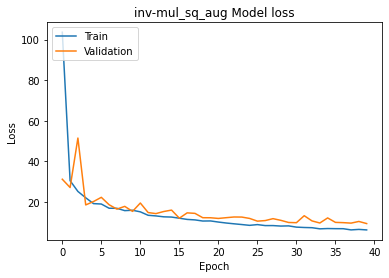

In [ ]:
#plt.plot(history.history['loss'])
#plt.plot(history.history['val_loss'])
plt.title('inv-mul_sq_aug Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()

#donot touch until up__________________________________________________________

-------run1-------------------

In [ ]:
#import tensorflow as tf

#base_model = InceptionV3(weights='imagenet', include_top=False)
#input = Input(shape=(300,300,3),name='input1')
input_gender = Input(shape=(1,),dtype='float32',name='input2')
input_age = Input(shape=(2,114),dtype='float32',name='input3')
output = base_model(input)
gender_embedding=Dense(16)(input_gender)
print (K.int_shape(output))
sq = keras.layers.GlobalAveragePooling2D()(output)
print (K.int_shape(sq))
sq = keras.layers.Reshape((1,1,2048))(sq)
sq = keras.layers.Dense(units=2048,activation="sigmoid")(sq)
block = keras.layers.multiply([output,sq])
#fine Squeeze and Excitation 1

net = keras.layers.add([output,block])
net = keras.layers.BatchNormalization()(net)
net = keras.layers.Activation("relu")(net)
net = keras.layers.MaxPooling2D(pool_size=(2, 2),name="block_1")(net)
print (K.int_shape(net))

x = keras.layers.MaxPooling2D(pool_size=(4,4))(net)
print (K.int_shape(x))
f=Flatten()(x)
f = Dense(256, activation='relu')(f)
x =Dense(228,activation='linear')(f)
y=Flatten()(input_age)
print(y.shape)
f = keras.layers.Multiply()([x,y])
f = keras.layers.Concatenate(axis=1)([f,gender_embedding])
predictions=Dense(1)(f)

#Embedding = keras.layers.Conv2D(256,kernel_size=(2,2),strides=1)(output)
#Embedding = keras.layers.AveragePooling2D(pool_size=(7,7))(Embedding)
#Embedding = Flatten()(Embedding)
#print (K.int_shape(Embedding))
#variance = Dense(1)(Embedding)

model = Model(inputs=[input,input_gender,input_age], outputs=predictions)
for i,layer in enumerate(model.layers):
    print (i,layer.name)

Adam=tf.keras.optimizers.Adam(lr=0.0001,beta_1=0.9,beta_2=0.999)
model.compile(optimizer=Adam, loss='mean_absolute_error', metrics=['MAE'],run_eagerly=True)
model.summary()

checkpoint =keras.callbacks.ModelCheckpoint(filepath='weights_inv-mul_sq_aug20_loss_dimg.{epoch:02d}-{val_loss:.2f}.hdf5',save_weights_only=True,period=40)
#model.fit_generator(DataGen.flow([x_train,gender_train],y_train,batch_size=batch_size),steps_per_epoch=np.ceil(len(y_train)/batch_size),epochs=50,verbose=1,validation_data=([x_valid,gender_valid,agev],y_valid))
history=model.fit([train_x,train_gen,agetr],train_y,batch_size=4,epochs=40,verbose=1,validation_data=([valid_x,valid_gen,agev],valid_y),callbacks = [checkpoint])
score = model.evaluate([test_x,test_gen,aget],test_y, batch_size=batch_size)
print('Test loss:', score[0])
print('Test MAE:', score[1])

87910968/87910968 [==============================] - 1s 0us/step
(None, 8, 8, 2048)
(None, 2048)
(None, 4, 4, 2048)
(None, 1, 1, 2048)
(None, 228)
0 input1
1 inception_v3
2 global_average_pooling2d
3 reshape
4 dense_1
5 multiply
6 add
7 batch_normalization_94
8 activation_94
9 block_1
10 max_pooling2d_4
11 flatten
12 dense_2
13 input3
14 dense_3
15 flatten_1
16 input2
17 multiply_1
18 dense
19 concatenate_2
20 dense_4
Model: "model"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input1 (InputLayer)            [(None, 300, 300, 3  0           []                               
                                )]                                                                
                                                                                                  
 inception_v3 (Functional)      (None, None, None,   21802784    ['i

/usr/local/lib/python3.8/dist-packages/keras/optimizers/optimizer_v2/adam.py:110: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


Epoch 1/40
840/840 [==============================] - 239s 273ms/step - loss: 83.3246 - MAE: 83.3246 - val_loss: 28.9323 - val_MAE: 28.9323
Epoch 2/40
840/840 [==============================] - 227s 270ms/step - loss: 30.3819 - MAE: 30.3819 - val_loss: 21.9624 - val_MAE: 21.9624
Epoch 3/40
840/840 [==============================] - 227s 270ms/step - loss: 25.6515 - MAE: 25.6515 - val_loss: 19.8334 - val_MAE: 19.8334
Epoch 4/40
840/840 [==============================] - 229s 272ms/step - loss: 21.1072 - MAE: 21.1072 - val_loss: 29.9866 - val_MAE: 29.9866
Epoch 5/40
840/840 [==============================] - 227s 271ms/step - loss: 19.1393 - MAE: 19.1393 - val_loss: 19.2781 - val_MAE: 19.2781
Epoch 6/40
840/840 [==============================] - 227s 270ms/step - loss: 18.1657 - MAE: 18.1657 - val_loss: 15.8336 - val_MAE: 15.8336
Epoch 7/40
840/840 [==============================] - 226s 270ms/step - loss: 17.3589 - MAE: 17.3589 - val_loss: 14.9777 - val_MAE: 14.9777
Epoch 8/40
840/840 [

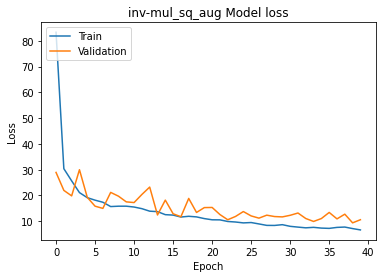

In [ ]:
#plt.plot(history.history['loss'])
#plt.plot(history.history['val_loss'])
#plt.title('inv-mul_sq_aug Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()

#donot ever touch ------------------------------------------------------------------------

#without multiply

In [ ]:
------------------run2-----------------------------------

SyntaxError: ignored

In [ ]:
import tensorflow as tf

base_model = InceptionV3(weights='imagenet', include_top=False)
input = Input(shape=(300,300,3),name='input1')
input_gender = Input(shape=(1,),dtype='float32',name='input2')
#input_age = Input(shape=(2,114),dtype='float32',name='input3')
output = base_model(input)
gender_embedding=Dense(16)(input_gender)
print (K.int_shape(output))
sq = keras.layers.GlobalAveragePooling2D()(output)
print (K.int_shape(sq))
sq = keras.layers.Reshape((1,1,2048))(sq)
sq = keras.layers.Dense(units=2048,activation="sigmoid")(sq)
block = keras.layers.multiply([output,sq])
#fine Squeeze and Excitation 1

net = keras.layers.add([output,block])
net = keras.layers.BatchNormalization()(net)
net = keras.layers.Activation("relu")(net)
net = keras.layers.MaxPooling2D(pool_size=(2, 2),name="block_1")(net)
print (K.int_shape(net))

x = keras.layers.MaxPooling2D(pool_size=(4,4))(net)
print (K.int_shape(x))
x=Flatten()(x)
f = Dense(256, activation='relu')(x)
f =Dense(228,activation='linear')(f)
#y=Flatten()(input_age)
#print(y.shape)
#f = keras.layers.Multiply()([x,y])
f = keras.layers.Concatenate(axis=1)([f,gender_embedding])
predictions=Dense(1)(f)

#Embedding = keras.layers.Conv2D(256,kernel_size=(2,2),strides=1)(output)
#Embedding = keras.layers.AveragePooling2D(pool_size=(7,7))(Embedding)
#Embedding = Flatten()(Embedding)
#print (K.int_shape(Embedding))
#variance = Dense(1)(Embedding)

model = Model(inputs=[input,input_gender], outputs=predictions)
for i,layer in enumerate(model.layers):
    print (i,layer.name)

Adam=tf.keras.optimizers.Adam(lr=0.0001,beta_1=0.9,beta_2=0.999)
model.compile(optimizer=Adam, loss='mean_absolute_error', metrics=['MAE'],run_eagerly=True)
model.summary()

checkpoint =keras.callbacks.ModelCheckpoint(filepath='weights_inv-mul_sq_aug20_loss_dimg.{epoch:02d}-{val_loss:.2f}.hdf5',save_weights_only=True,period=40)
#model.fit_generator(DataGen.flow([x_train,gender_train],y_train,batch_size=batch_size),steps_per_epoch=np.ceil(len(y_train)/batch_size),epochs=50,verbose=1,validation_data=([x_valid,gender_valid,agev],y_valid))
history=model.fit([train_x,train_gen],train_y,batch_size=4,epochs=40,verbose=1,validation_data=([valid_x,valid_gen],valid_y),callbacks = [checkpoint])
score = model.evaluate([test_x,test_gen],test_y, batch_size=batch_size)
print('Test loss:', score[0])
print('Test MAE:', score[1])

(None, 8, 8, 2048)
(None, 2048)
(None, 4, 4, 2048)
(None, 1, 1, 2048)
0 input1
1 inception_v3
2 global_average_pooling2d_1
3 reshape_1
4 dense_6
5 multiply_2
6 add_1
7 batch_normalization_189
8 activation_189
9 block_1
10 max_pooling2d_9
11 flatten_2
12 dense_7
13 input2
14 dense_8
15 dense_5
16 concatenate_5
17 dense_9
Model: "model_1"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input1 (InputLayer)            [(None, 300, 300, 3  0           []                               
                                )]                                                                
                                                                                                  
 inception_v3 (Functional)      (None, None, None,   21802784    ['input1[0][0]']                 
                                2048)                              

Epoch 1/40
840/840 [==============================] - 228s 271ms/step - loss: 28.0770 - MAE: 28.0770 - val_loss: 19.6839 - val_MAE: 19.6839
Epoch 2/40
840/840 [==============================] - 227s 271ms/step - loss: 18.9078 - MAE: 18.9078 - val_loss: 21.9849 - val_MAE: 21.9849
Epoch 3/40
840/840 [==============================] - 226s 270ms/step - loss: 16.2072 - MAE: 16.2072 - val_loss: 15.2191 - val_MAE: 15.2191
Epoch 4/40
840/840 [==============================] - 227s 270ms/step - loss: 15.4273 - MAE: 15.4273 - val_loss: 15.9314 - val_MAE: 15.9314
Epoch 5/40
840/840 [==============================] - 227s 270ms/step - loss: 14.4569 - MAE: 14.4569 - val_loss: 17.0906 - val_MAE: 17.0906
Epoch 6/40
840/840 [==============================] - 227s 270ms/step - loss: 12.5477 - MAE: 12.5477 - val_loss: 19.7724 - val_MAE: 19.7724
Epoch 7/40
840/840 [==============================] - 227s 270ms/step - loss: 12.2989 - MAE: 12.2989 - val_loss: 14.6240 - val_MAE: 14.6240
Epoch 8/40
840/840 [

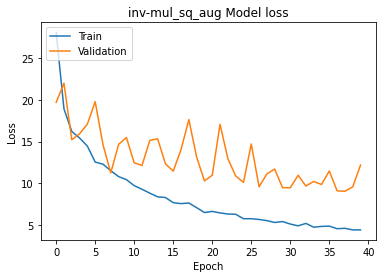

In [ ]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('inv-mul_sq_aug Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()

In [ ]:
import tensorflow as tf

base_model = InceptionV3(weights='imagenet', include_top=False)
input = Input(shape=(300,300,3),name='input1')
input_gender = Input(shape=(1,),dtype='float32',name='input2')
#input_age = Input(shape=(2,114),dtype='float32',name='input3')
output = base_model(input)
gender_embedding=Dense(16)(input_gender)
print (K.int_shape(output))
sq = keras.layers.GlobalAveragePooling2D()(output)
print (K.int_shape(sq))
sq = keras.layers.Reshape((1,1,2048))(sq)
sq = keras.layers.Dense(units=2048,activation="sigmoid")(sq)
block = keras.layers.multiply([output,sq])
#fine Squeeze and Excitation 1

net = keras.layers.add([output,block])
net = keras.layers.BatchNormalization()(net)
net = keras.layers.Activation("relu")(net)
net = keras.layers.MaxPooling2D(pool_size=(2, 2),name="block_1")(net)
print (K.int_shape(net))

x = keras.layers.MaxPooling2D(pool_size=(4,4))(net)
print (K.int_shape(x))
x=Flatten()(x)
f = Dense(512, activation='relu')(x)
f =Dense(228,activation='linear')(f)
#y=Flatten()(input_age)
#print(y.shape)
#f = keras.layers.Multiply()([x,y])
f = keras.layers.Concatenate(axis=1)([f,gender_embedding])
predictions=Dense(1)(f)

#Embedding = keras.layers.Conv2D(256,kernel_size=(2,2),strides=1)(output)
#Embedding = keras.layers.AveragePooling2D(pool_size=(7,7))(Embedding)
#Embedding = Flatten()(Embedding)
#print (K.int_shape(Embedding))
#variance = Dense(1)(Embedding)

model = Model(inputs=[input,input_gender], outputs=predictions)
for i,layer in enumerate(model.layers):
    print (i,layer.name)

Adam=tf.keras.optimizers.Adam(lr=0.0001,beta_1=0.9,beta_2=0.999)
model.compile(optimizer=Adam, loss='mean_absolute_error', metrics=['MAE'],run_eagerly=True)
model.summary()

checkpoint =keras.callbacks.ModelCheckpoint(filepath='weights_inv-mul_sq_aug20_loss_dimg.{epoch:02d}-{val_loss:.2f}.hdf5',save_weights_only=True,period=40)
#model.fit_generator(DataGen.flow([x_train,gender_train],y_train,batch_size=batch_size),steps_per_epoch=np.ceil(len(y_train)/batch_size),epochs=50,verbose=1,validation_data=([x_valid,gender_valid,agev],y_valid))
history=model.fit([train_x,train_gen],train_y,batch_size=4,epochs=40,verbose=1,validation_data=([valid_x,valid_gen],valid_y),callbacks = [checkpoint])
score = model.evaluate([test_x,test_gen],test_y, batch_size=batch_size)
print('Test loss:', score[0])
print('Test MAE:', score[1])

(None, 8, 8, 2048)
(None, 2048)
(None, 4, 4, 2048)
(None, 1, 1, 2048)
0 input1
1 inception_v3
2 global_average_pooling2d
3 reshape
4 dense_1
5 multiply
6 add
7 batch_normalization_94
8 activation_94
9 block_1
10 max_pooling2d_4
11 flatten
12 dense_2
13 input2
14 dense_3
15 dense
16 concatenate_2
17 dense_4
Model: "model"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input1 (InputLayer)            [(None, 300, 300, 3  0           []                               
                                )]                                                                
                                                                                                  
 inception_v3 (Functional)      (None, None, None,   21802784    ['input1[0][0]']                 
                                2048)                                              

/usr/local/lib/python3.8/dist-packages/keras/optimizers/optimizer_v2/adam.py:110: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


Epoch 1/40
840/840 [==============================] - 247s 283ms/step - loss: 27.3550 - MAE: 27.3550 - val_loss: 22.6889 - val_MAE: 22.6889
Epoch 2/40
840/840 [==============================] - 234s 278ms/step - loss: 18.5763 - MAE: 18.5763 - val_loss: 15.2506 - val_MAE: 15.2506
Epoch 3/40
840/840 [==============================] - 232s 277ms/step - loss: 15.5847 - MAE: 15.5847 - val_loss: 13.5918 - val_MAE: 13.5918
Epoch 4/40
840/840 [==============================] - 231s 275ms/step - loss: 14.9635 - MAE: 14.9635 - val_loss: 15.6879 - val_MAE: 15.6879
Epoch 5/40
840/840 [==============================] - 232s 276ms/step - loss: 13.4534 - MAE: 13.4534 - val_loss: 13.7402 - val_MAE: 13.7402
Epoch 6/40
840/840 [==============================] - 231s 275ms/step - loss: 12.4179 - MAE: 12.4179 - val_loss: 21.4092 - val_MAE: 21.4092
Epoch 7/40
840/840 [==============================] - 231s 275ms/step - loss: 12.1210 - MAE: 12.1210 - val_loss: 12.5616 - val_MAE: 12.5616
Epoch 8/40
840/840 [

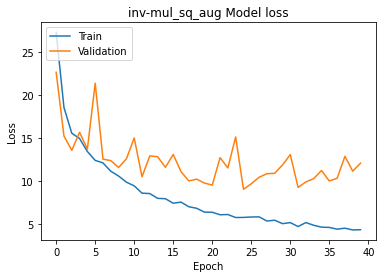

In [ ]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('inv-mul_sq_aug Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()

In [ ]:
import tensorflow as tf

base_model = InceptionV3(weights='imagenet', include_top=False)
input = Input(shape=(300,300,3),name='input1')
input_gender = Input(shape=(1,),dtype='float32',name='input2')
#input_age = Input(shape=(2,114),dtype='float32',name='input3')
output = base_model(input)
gender_embedding=Dense(16)(input_gender)
print (K.int_shape(output))
sq = keras.layers.GlobalAveragePooling2D()(output)
print (K.int_shape(sq))
sq = keras.layers.Reshape((1,1,2048))(sq)
sq = keras.layers.Dense(units=2048,activation="sigmoid")(sq)
block = keras.layers.multiply([output,sq])
#fine Squeeze and Excitation 1

net = keras.layers.add([output,block])
net = keras.layers.BatchNormalization()(net)
net = keras.layers.Activation("relu")(net)
net = keras.layers.MaxPooling2D(pool_size=(2, 2),name="block_1")(net)
print (K.int_shape(net))

x = keras.layers.MaxPooling2D(pool_size=(4,4))(net)
print (K.int_shape(x))
x=Flatten()(x)
f = Dense(256, activation='relu')(x)
#f =Dense(228,activation='linear')(f)
#y=Flatten()(input_age)
#print(y.shape)
#f = keras.layers.Multiply()([x,y])
f = keras.layers.Concatenate(axis=1)([f,gender_embedding])
predictions=Dense(1)(f)

#Embedding = keras.layers.Conv2D(256,kernel_size=(2,2),strides=1)(output)
#Embedding = keras.layers.AveragePooling2D(pool_size=(7,7))(Embedding)
#Embedding = Flatten()(Embedding)
#print (K.int_shape(Embedding))
#variance = Dense(1)(Embedding)

model = Model(inputs=[input,input_gender], outputs=predictions)
for i,layer in enumerate(model.layers):
    print (i,layer.name)

Adam=tf.keras.optimizers.Adam(lr=0.0001,beta_1=0.9,beta_2=0.999)
model.compile(optimizer=Adam, loss='mean_absolute_error', metrics=['MAE'],run_eagerly=True)
model.summary()

checkpoint =keras.callbacks.ModelCheckpoint(filepath='weights_inv-mul_sq_aug20_loss_dimg.{epoch:02d}-{val_loss:.2f}.hdf5',save_weights_only=True,period=40)
#model.fit_generator(DataGen.flow([x_train,gender_train],y_train,batch_size=batch_size),steps_per_epoch=np.ceil(len(y_train)/batch_size),epochs=50,verbose=1,validation_data=([x_valid,gender_valid,agev],y_valid))
history=model.fit([train_x,train_gen],train_y,batch_size=4,epochs=40,verbose=1,validation_data=([valid_x,valid_gen],valid_y),callbacks = [checkpoint])
score = model.evaluate([test_x,test_gen],test_y, batch_size=batch_size)
print('Test loss:', score[0])

(None, 8, 8, 2048)
(None, 2048)
(None, 4, 4, 2048)
(None, 1, 1, 2048)
0 input1
1 inception_v3
2 global_average_pooling2d_1
3 reshape_1
4 dense_6
5 multiply_1
6 add_1
7 batch_normalization_189
8 activation_189
9 block_1
10 max_pooling2d_9
11 flatten_1
12 input2
13 dense_7
14 dense_5
15 concatenate_5
16 dense_8
Model: "model_1"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input1 (InputLayer)            [(None, 300, 300, 3  0           []                               
                                )]                                                                
                                                                                                  
 inception_v3 (Functional)      (None, None, None,   21802784    ['input1[0][0]']                 
                                2048)                                         

Epoch 1/40
840/840 [==============================] - 232s 275ms/step - loss: 28.3871 - MAE: 28.3871 - val_loss: 18.2595 - val_MAE: 18.2595
Epoch 2/40
840/840 [==============================] - 228s 272ms/step - loss: 19.4057 - MAE: 19.4057 - val_loss: 16.6375 - val_MAE: 16.6375
Epoch 3/40
840/840 [==============================] - 228s 272ms/step - loss: 15.9974 - MAE: 15.9974 - val_loss: 15.6527 - val_MAE: 15.6527
Epoch 4/40
840/840 [==============================] - 228s 272ms/step - loss: 14.5798 - MAE: 14.5798 - val_loss: 16.0136 - val_MAE: 16.0136
Epoch 5/40
840/840 [==============================] - 228s 272ms/step - loss: 13.4950 - MAE: 13.4950 - val_loss: 14.3049 - val_MAE: 14.3049
Epoch 6/40
840/840 [==============================] - 228s 271ms/step - loss: 12.5565 - MAE: 12.5565 - val_loss: 15.7571 - val_MAE: 15.7571
Epoch 7/40
840/840 [==============================] - 228s 271ms/step - loss: 12.0530 - MAE: 12.0530 - val_loss: 12.7153 - val_MAE: 12.7153
Epoch 8/40
840/840 [

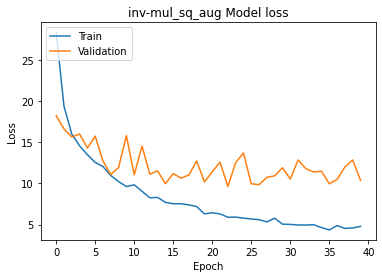

In [ ]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('inv-mul_sq_aug Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()

#donot touch up--------------------------------

In [ ]:
def channel_attention(input_feature):
  kernel_initializer = tf.keras.initializers.variance_scaling()
  bias_initializer = tf.constant_initializer(value=0.0)
  channel = input_feature.get_shape()[-1]
  ratio=8
  avg_pool = tf.reduce_mean(input_feature, axis=[1,2], keepdims=True)
  assert avg_pool.get_shape()[1:] == (1,1,channel)
  avg_pool =Dense(
                                 units=channel//ratio,
                                 activation=tf.nn.relu,
                                 kernel_initializer=kernel_initializer,
                                 bias_initializer=bias_initializer) (avg_pool)
  assert avg_pool.get_shape()[1:] == (1,1,channel//ratio)
  avg_pool = Dense(
                                 units=channel,                             
                                 kernel_initializer=kernel_initializer,
                                 bias_initializer=bias_initializer)  (avg_pool)  
  assert avg_pool.get_shape()[1:] == (1,1,channel)

  max_pool = tf.reduce_max(input_feature, axis=[1,2], keepdims=True)    
  assert max_pool.get_shape()[1:] == (1,1,channel)
  max_pool = Dense(
                                 units=channel//ratio,
                                 activation=tf.nn.relu) (max_pool)  
  assert max_pool.get_shape()[1:] == (1,1,channel//ratio)
  max_pool = Dense(
                                 units=channel)  (max_pool)
  assert max_pool.get_shape()[1:] == (1,1,channel)

  scale = tf.keras.activations.sigmoid(avg_pool + max_pool) 
  return input_feature * scale

In [ ]:
import tensorflow as tf

base_model = InceptionV3(weights='imagenet', include_top=False)
input = Input(shape=(300,300,3),name='input1')
input_gender = Input(shape=(1,),dtype='float32',name='input2')
input_age = Input(shape=(2,114),dtype='float32',name='input3')
output = base_model(input)
gender_embedding=Dense(16)(input_gender)
print (K.int_shape(output))
sq = keras.layers.GlobalAveragePooling2D()(output)
print (K.int_shape(sq))
sq = keras.layers.Reshape((1,1,2048))(sq)
sq = keras.layers.Dense(units=2048,activation="sigmoid")(sq)
block = keras.layers.multiply([output,sq])
#fine Squeeze and Excitation 1

net = keras.layers.add([output,block])
net = keras.layers.BatchNormalization()(net)
net = keras.layers.Activation("relu")(net)
net = keras.layers.MaxPooling2D(pool_size=(2, 2),name="block_1")(net)
print (K.int_shape(net))

x=channel_attention(net)
x = keras.layers.MaxPooling2D(pool_size=(4,4))(x)
print (K.int_shape(x))
x=Flatten()(x)
f = keras.layers.Concatenate(axis=1)([x,gender_embedding])
f = Dense(256, activation='relu')(f)
x =Dense(228,activation='linear')(f)
y=Flatten()(input_age)
print(y.shape)
f = keras.layers.Multiply()([x,y])
predictions=Dense(1)(f)

#Embedding = keras.layers.Conv2D(256,kernel_size=(2,2),strides=1)(output)
#Embedding = keras.layers.AveragePooling2D(pool_size=(7,7))(Embedding)
#Embedding = Flatten()(Embedding)
#print (K.int_shape(Embedding))
#variance = Dense(1)(Embedding)

model = Model(inputs=[input,input_gender,input_age], outputs=predictions)
for i,layer in enumerate(model.layers):
    print (i,layer.name)

Adam=tf.keras.optimizers.Adam(lr=0.0001,beta_1=0.9,beta_2=0.999)
model.compile(optimizer=Adam, loss='mean_absolute_error', metrics=['MAE'],run_eagerly=True)
model.summary()

checkpoint =keras.callbacks.ModelCheckpoint(filepath='weights_inv-mul_sq_aug20_loss_dimg.{epoch:02d}-{val_loss:.2f}.hdf5',save_weights_only=True,period=20)
#model.fit_generator(DataGen.flow([x_train,gender_train],y_train,batch_size=batch_size),steps_per_epoch=np.ceil(len(y_train)/batch_size),epochs=50,verbose=1,validation_data=([x_valid,gender_valid,agev],y_valid))
history=model.fit([train_x,train_gen,agetr],train_y,batch_size=4,epochs=20,verbose=1,validation_data=([valid_x,valid_gen,agev],valid_y),callbacks = [checkpoint])
score = model.evaluate([test_x,test_gen,aget],test_y, batch_size=batch_size)
print('Test loss:', score[0])
print('Test MAE:', score[1])

(None, 8, 8, 2048)
(None, 2048)
(None, 4, 4, 2048)
(None, 1, 1, 2048)
(None, 228)
0 input1
1 inception_v3
2 global_average_pooling2d_2
3 reshape_2
4 dense_10
5 multiply_2
6 add_2
7 batch_normalization_284
8 activation_284
9 block_1
10 tf.math.reduce_mean
11 tf.math.reduce_max
12 dense_11
13 dense_13
14 dense_12
15 dense_14
16 tf.__operators__.add
17 tf.math.sigmoid
18 tf.math.multiply
19 max_pooling2d_14
20 input2
21 flatten_2
22 dense_9
23 concatenate_8
24 dense_15
25 input3
26 dense_16
27 flatten_3
28 multiply_3
29 dense_17
Model: "model_2"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input1 (InputLayer)            [(None, 300, 300, 3  0           []                               
                                )]                                                                
                                                       

/usr/local/lib/python3.8/dist-packages/keras/optimizers/optimizer_v2/adam.py:110: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


Epoch 1/20
840/840 [==============================] - 250s 298ms/step - loss: 52.9421 - MAE: 52.9421 - val_loss: 23.9615 - val_MAE: 23.9615
Epoch 2/20
840/840 [==============================] - 247s 294ms/step - loss: 27.0979 - MAE: 27.0979 - val_loss: 34.6591 - val_MAE: 34.6591
Epoch 3/20
840/840 [==============================] - 248s 295ms/step - loss: 22.5889 - MAE: 22.5889 - val_loss: 15.7755 - val_MAE: 15.7755
Epoch 4/20
840/840 [==============================] - 248s 296ms/step - loss: 18.5244 - MAE: 18.5244 - val_loss: 18.0241 - val_MAE: 18.0241
Epoch 5/20
840/840 [==============================] - 249s 297ms/step - loss: 16.6283 - MAE: 16.6283 - val_loss: 19.2707 - val_MAE: 19.2707
Epoch 6/20
840/840 [==============================] - 247s 294ms/step - loss: 16.1077 - MAE: 16.1077 - val_loss: 14.6936 - val_MAE: 14.6936
Epoch 7/20
840/840 [==============================] - 246s 293ms/step - loss: 15.2948 - MAE: 15.2948 - val_loss: 24.0431 - val_MAE: 24.0431
Epoch 8/20
840/840 [